# Column Profiling:

#### MMMM-YY : Reporting Date (Monthly)
#### Driver_ID : Unique id for drivers
#### Age : Age of the driver
#### Gender : Gender of the driver – Male : 0, Female: 1
#### City : City Code of the driver
#### Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
#### Income : Monthly average Income of the driver
#### Date Of Joining : Joining date for the driver
#### LastWorkingDate : Last date of working for the driver
#### Joining Designation : Designation of the driver at the time of joining
#### Grade : Grade of the driver at the time of reporting
#### Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
#### Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

# Importing necesary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/ola_driver_scaler.csv')
df.head(10)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [ ]:
df.drop(['Unnamed: 0'],inplace=True,axis=1)
df.head(10)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


# 1. Define Problem Statement and perform Exploratory Data Analysis (10 points).
### A. Definition of problem (as per given problem statement with additional views).

### Problem Statement

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

Demographics (city, age, gender etc.)
Tenure information (joining date, Last Date)
Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

### B. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.

In [ ]:
df.shape

(19104, 13)

### The data has 19104 datapoints with 13 features.

In [ ]:
df.dtypes

MMM-YY                   object
Driver_ID                 int64
Age                     float64
Gender                  float64
City                     object
Education_Level           int64
Income                    int64
Dateofjoining            object
LastWorkingDate          object
Joining Designation       int64
Grade                     int64
Total Business Value      int64
Quarterly Rating          int64
dtype: object

### There are 7 features with data type 'int64', 4 features with datatype 'object' and 2 features with datatype 'float64'.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [ ]:
df.describe(include='all')

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104,19104.000000,19043.000000,19052.000000,19104,19104.000000,19104.000000,19104,1616,19104.000000,19104.000000,1.910400e+04,19104.000000
unique,24,NaN,NaN,NaN,29,NaN,NaN,869,493,NaN,NaN,NaN,NaN
top,01/01/19,NaN,NaN,NaN,C20,NaN,NaN,23/07/15,29/07/20,NaN,NaN,NaN,NaN
freq,1022,NaN,NaN,NaN,1008,NaN,NaN,192,70,NaN,NaN,NaN,NaN
mean,NaN,1415.591133,34.668435,0.418749,NaN,1.021671,65652.025126,NaN,NaN,1.690536,2.252670,5.716621e+05,2.008899
std,NaN,810.705321,6.257912,0.493367,NaN,0.800167,30914.515344,NaN,NaN,0.836984,1.026512,1.128312e+06,1.009832
min,NaN,1.000000,21.000000,0.000000,NaN,0.000000,10747.000000,NaN,NaN,1.000000,1.000000,-6.000000e+06,1.000000
25%,NaN,710.000000,30.000000,0.000000,NaN,0.000000,42383.000000,NaN,NaN,1.000000,1.000000,0.000000e+00,1.000000
50%,NaN,1417.000000,34.000000,0.000000,NaN,1.000000,60087.000000,NaN,NaN,1.000000,2.000000,2.500000e+05,2.000000
75%,NaN,2137.000000,39.000000,1.000000,NaN,2.000000,83969.000000,NaN,NaN,2.000000,3.000000,6.997000e+05,3.000000


###Summary -
 - The data is taken from 29 different cities.
 - The mean age of the drivers is 34 with minimum age as 21 and maximum age as 58.
 - The mean income of the drivers is 65652 with minimum income as 10747 and maximum income as 188418.
 - The range of the "Quarterly Rating" is from 1 to 4 with mean value as 2.

### C. Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)

<Axes: xlabel='Gender', ylabel='count'>

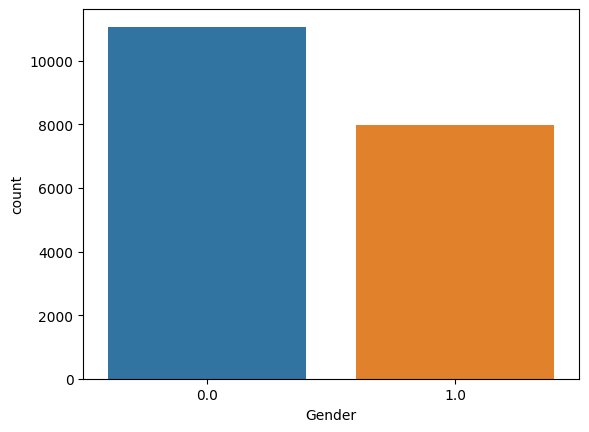

In [ ]:
sns.countplot(data=df,x='Gender')

### There are more than 10k datapoints as male drivers and around 8k datapoints having female drivers.


<Axes: xlabel='Education_Level', ylabel='count'>

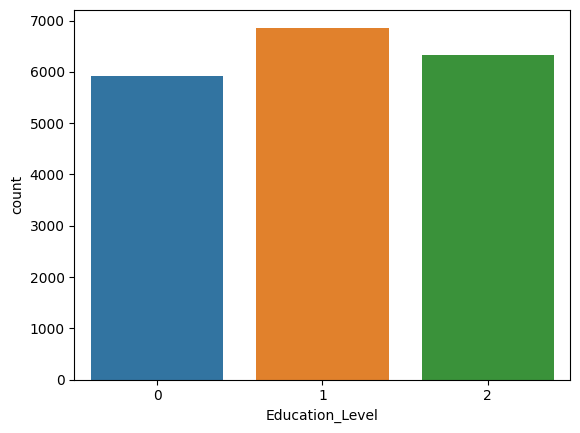

In [ ]:
sns.countplot(data=df,x='Education_Level')

 - The data has around 6k datapoints with education level 0, nearly 7k datapoints with education level 1 and around 6.5k datapoints with education level 2

<Axes: xlabel='Income', ylabel='Count'>

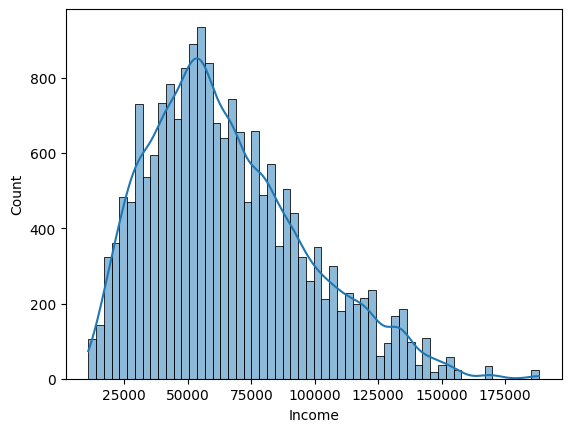

In [ ]:
sns.histplot(data=df,x='Income',kde=True)


 - Around 90% of the drivers have the income range between 25k and 125k.

<Axes: xlabel='Quarterly Rating', ylabel='count'>

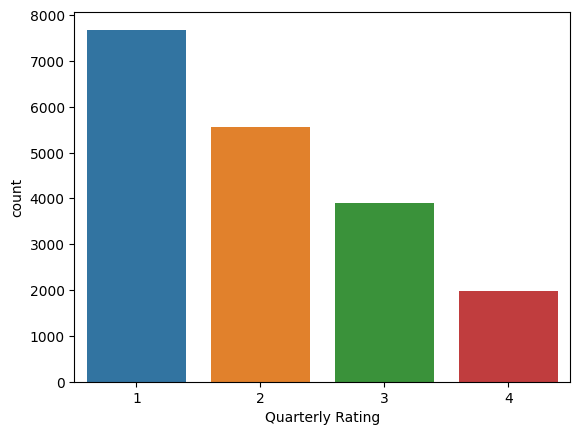

In [ ]:
sns.countplot(data=df,x='Quarterly Rating')

 - There are around 7500 datapoints with quartelr rating as 1, 5500 datapoints with quarterly rating as 2, 4400 datapoints with quarterly rating as 3 and nearly 2000 datapoints with quarterly rating as 4.

<Axes: xlabel='Total Business Value'>

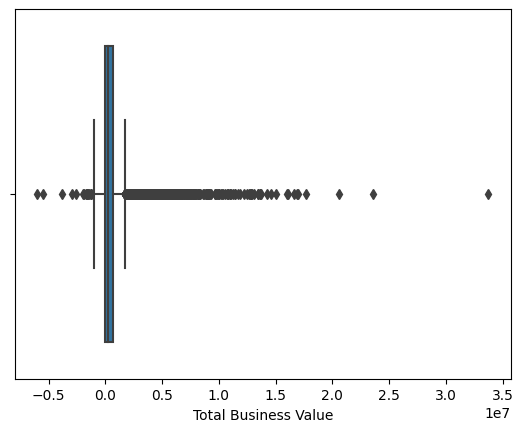

In [ ]:
sns.boxplot(data=df,x='Total Business Value')

### D. Bivariate Analysis (Relationships between important variables)

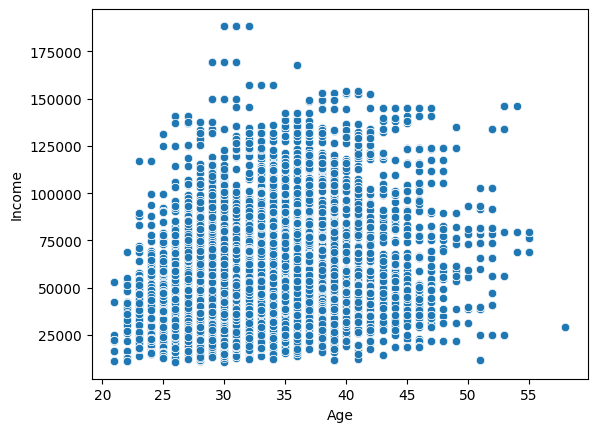

In [ ]:
sns.scatterplot(x='Age', y='Income', data=df)
plt.show()

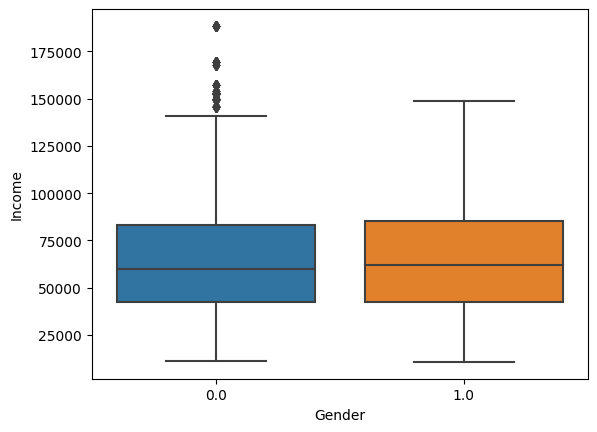

In [ ]:
sns.boxplot(x='Gender', y='Income', data=df)
plt.show()

 - The income of the male and female drivers is almost similar except few male drivers who have some high income.

<ipython-input-290-787941b06462>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


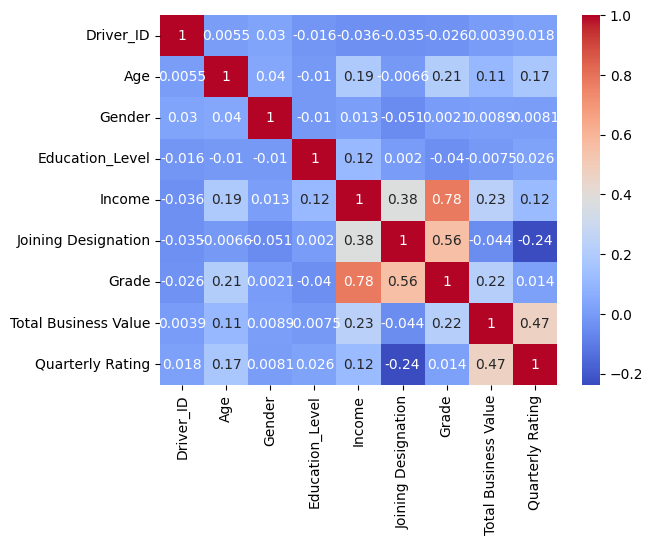

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

 - The features Grade and Income are so much correlated(0.78 corr factor).
 - The features AGe and Grade are somewhat correlated.
 - The features Joining_Designation and grade are correlated with correlation factor as 0.56.
 - The features Quarterly rating and Total Business Value and correlated with corr factor 0.47.

### E. Illustrate the insights based on EDA
 - Comments on range of attributes, outliers of various attributes
 - Comments on the distribution of the variables and relationship between them
 - Comments for each univariate and bivariate plots

### The Comments are as Follows.
- The data has around 6k datapoints with education level 0, nearly 7k datapoints with education level 1 and around 6.5k datapoints with education level 2.
- Around 90% of the drivers have the income range between 25k and 125k.
- There are around 7500 datapoints with quartelr rating as 1, 5500 datapoints with quarterly rating as 2, 4400 datapoints with quarterly rating as 3 and nearly 2000 datapoints with quarterly rating as 4.
- The income of the male and female drivers is almost similar except few male drivers who have some high income.
- The features Grade and Income are so much correlated(0.78 corr factor).
- The features AGe and Grade are somewhat correlated.
- The features Joining_Designation and grade are correlated with correlation factor as 0.56.
- The features Quarterly rating and Total Business Value and correlated with corr factor 0.47.


# Creating Target Variable.

In [ ]:
df['target'] = df['LastWorkingDate'].notnull().astype(int)
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,target
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2,0
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2,0
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,1
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0


# conversion of categorical attributes to 'category'.

In [ ]:
# Step 1: Calculate the mean target for each category in the entire dataset
means = df.groupby('City')['target'].mean()

# Step 2: Replace categorical values with mean target in the original dataset
df['City'] = df['City'].map(means)

In [ ]:
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'], format='%d/%m/%y')
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'], format='%d/%m/%y')
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'], format='%d/%m/%y')
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,target
0,2019-01-01,1,28.0,0.0,0.105948,2,57387,2018-12-24,NaT,1,1,2381060,2,0
1,2019-01-02,1,28.0,0.0,0.105948,2,57387,2018-12-24,NaT,1,1,-665480,2,0
2,2019-01-03,1,28.0,0.0,0.105948,2,57387,2018-12-24,2019-11-03,1,1,0,2,1
3,2020-01-11,2,31.0,0.0,0.085386,2,67016,2020-06-11,NaT,2,2,0,1,0
4,2020-01-12,2,31.0,0.0,0.085386,2,67016,2020-06-11,NaT,2,2,0,1,0


In [ ]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,target
0,2019-01-01,1,28.0,0.0,0.105948,2,57387,2018-12-24,NaT,1,1,2381060,2,0
1,2019-01-02,1,28.0,0.0,0.105948,2,57387,2018-12-24,NaT,1,1,-665480,2,0
2,2019-01-03,1,28.0,0.0,0.105948,2,57387,2018-12-24,2019-11-03,1,1,0,2,1
3,2020-01-11,2,31.0,0.0,0.085386,2,67016,2020-06-11,NaT,2,2,0,1,0
4,2020-01-12,2,31.0,0.0,0.085386,2,67016,2020-06-11,NaT,2,2,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  float64       
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
 13  target          

In [ ]:
df.isnull().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
target                      0
dtype: int64

### The features 'Age' , "Gender" and "LastWorkingDate" has some null values. The Feature "LastWorkingDate" has 17488 null values which indicates that driver whose last working day is null is still working for OLA and rest left the job.

In [ ]:
df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating', 'target'],
      dtype='object')

In [ ]:
lst1 = ['Driver_ID','MMM-YY']

df = df.groupby(by = lst1, as_index = False).aggregate({'Age' : 'max',

'Gender' : 'first',

'City' : 'first',

'Education_Level' : 'last',

'LastWorkingDate':'last',

'Income' : 'last',

'Dateofjoining':'last',

'Joining Designation' : 'last',

'target':'last',

'Grade' : 'last',

'Total Business Value' : 'sum',

'Quarterly Rating' : 'last'})

# 1. Data Preprocessing.


### B. Feature Engineering.
### 1. Create a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1.

In [ ]:
#Quarterly rating at the beginning
QRB = df.groupby ('Driver_ID').agg({'Quarterly Rating': 'first' })
#Quarterly rating at the end
QRE = df.groupby ('Driver_ID').agg({'Quarterly Rating': 'last'})
#The dataset which has the employee ids and a bollean value which tells if the rati
QR = (QRE[ 'Quarterly Rating'] >QRB[ 'Quarterly Rating']).reset_index()
#the employee ids whose rating has increased
empid = QR[QR['Quarterly Rating']==True][ 'Driver_ID']
Q = []
for i in df['Driver_ID']:
  if i in empid. values:
    Q.append(1)
  else:
    Q.append(0)
df['Quarterly_Rating_Increased'] = Q

In [ ]:
df['Quarterly_Rating_Increased'].value_counts()

0    14648
1     4456
Name: Quarterly_Rating_Increased, dtype: int64

### 2. Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1.

In [ ]:
#Income at the beginning
INC_f = df.groupby ('Driver_ID').agg({'Income': 'first' })
#Income at the end
INC_l = df.groupby ('Driver_ID').agg({'Income': 'last'})
#The dataset which has the employee ids and a bollean value which tells if the income is increased.
QR = (INC_f['Income'] < INC_l['Income']).reset_index()
#the employee ids whose rating has increased
empid = QR[QR['Income']==True][ 'Driver_ID']
Q = []
for i in df['Driver_ID']:
  if i in empid.values:
    Q.append(1)
  else:
    Q.append(0)
df['Income_Increased'] = Q

In [ ]:
df['Income_Increased'].value_counts()

0    18128
1      976
Name: Income_Increased, dtype: int64

In [ ]:
df.drop(['Driver_ID','MMM-YY','Dateofjoining','LastWorkingDate'],inplace=True,axis=1)

### A. KNN Imputation.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         19043 non-null  float64
 1   Gender                      19052 non-null  float64
 2   City                        19104 non-null  float64
 3   Education_Level             19104 non-null  int64  
 4   Income                      19104 non-null  int64  
 5   Joining Designation         19104 non-null  int64  
 6   target                      19104 non-null  int64  
 7   Grade                       19104 non-null  int64  
 8   Total Business Value        19104 non-null  int64  
 9   Quarterly Rating            19104 non-null  int64  
 10  Quarterly_Rating_Increased  19104 non-null  int64  
 11  Income_Increased            19104 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1.7 MB


In [ ]:
df.isnull().sum()

Age                           61
Gender                        52
City                           0
Education_Level                0
Income                         0
Joining Designation            0
target                         0
Grade                          0
Total Business Value           0
Quarterly Rating               0
Quarterly_Rating_Increased     0
Income_Increased               0
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
df2 = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df2.isnull().sum()

Age                           0
Gender                        0
City                          0
Education_Level               0
Income                        0
Joining Designation           0
target                        0
Grade                         0
Total Business Value          0
Quarterly Rating              0
Quarterly_Rating_Increased    0
Income_Increased              0
dtype: int64

In [ ]:
df2

,Age,Gender,City,Education_Level,Income,Joining Designation,target,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Increased,Income_Increased
0,28.0,0.0,0.105948,2.0,57387.0,1.0,0.0,1.0,2381060.0,2.0,0.0,0.0
1,28.0,0.0,0.105948,2.0,57387.0,1.0,0.0,1.0,-665480.0,2.0,0.0,0.0
2,28.0,0.0,0.105948,2.0,57387.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0
3,31.0,0.0,0.085386,2.0,67016.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0
4,31.0,0.0,0.085386,2.0,67016.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19099,30.0,0.0,0.076336,2.0,70254.0,2.0,0.0,2.0,740280.0,3.0,1.0,0.0
19100,30.0,0.0,0.076336,2.0,70254.0,2.0,0.0,2.0,448370.0,3.0,1.0,0.0
19101,30.0,0.0,0.076336,2.0,70254.0,2.0,0.0,2.0,0.0,2.0,1.0,0.0
19102,30.0,0.0,0.076336,2.0,70254.0,2.0,0.0,2.0,200420.0,2.0,1.0,0.0


### C. Class Imbalance Treatment.


In [ ]:
df2['target'].value_counts()

0.0    17488
1.0     1616
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


X = df2.drop('target', axis=1)
y = df2['target']

# Step 1: Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

### D. Standardization.

###Standardization is applied in above code.

# 3. Model Building.

### A. 1 Ensemble - Bagging Algorithm

In [ ]:
# Step 4: Bagging Algorithm (Random Forest)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_resampled, y_resampled)
y_pred_rf = random_forest.predict(X_test)



### B. 1 Ensemble - Boosting Algorithm

In [ ]:
# Step 5: Boosting Algorithm (AdaBoost)
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X_resampled, y_resampled)
y_pred_adaboost = adaboost.predict(X_test)



# 4.Results Evaluation

### A. ROC AUC Curve & comments

Random Forest ROC-AUC: 0.5576831516893326


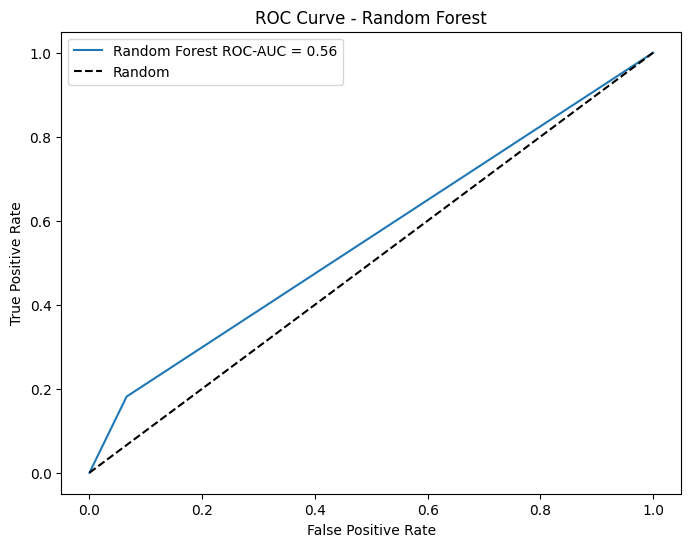

In [ ]:
# Calculate ROC-AUC for Random Forest
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print(f"Random Forest ROC-AUC: {roc_auc_rf}")

# Plot ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest ROC-AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()



AdaBoost ROC-AUC: 0.7683688397579619


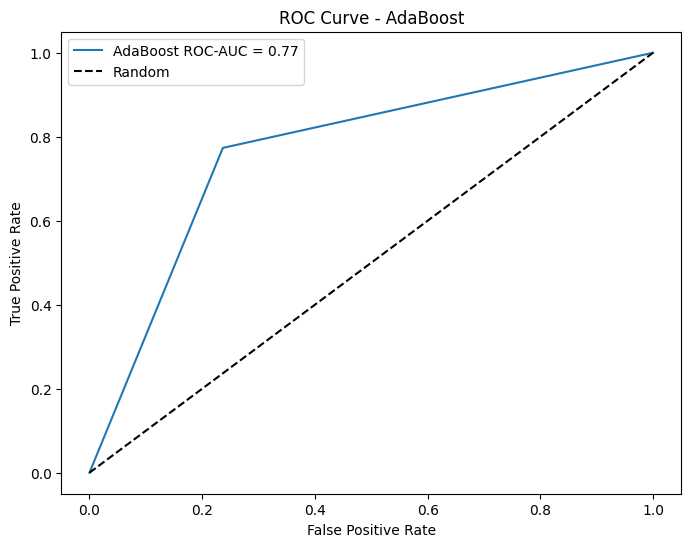

In [ ]:
# Calculate ROC-AUC for AdaBoost
roc_auc_adaboost = roc_auc_score(y_test, y_pred_adaboost)
print(f"AdaBoost ROC-AUC: {roc_auc_adaboost}")

# Plot ROC curve for AdaBoost
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_pred_adaboost)
plt.figure(figsize=(8, 6))
plt.plot(fpr_adaboost, tpr_adaboost, label=f'AdaBoost ROC-AUC = {roc_auc_adaboost:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoost')
plt.legend()
plt.show()



### B. Classification Report (Confusion Matrix etc)

In [ ]:
# Classification Report for AdaBoost
print("Classification Report - AdaBoost:")
print(classification_report(y_test, y_pred_adaboost))

Classification Report - AdaBoost:
              precision    recall  f1-score   support

         0.0       0.97      0.76      0.86      3490
         1.0       0.24      0.77      0.36       331

    accuracy                           0.76      3821
   macro avg       0.60      0.77      0.61      3821
weighted avg       0.91      0.76      0.81      3821



In [ ]:
# Classification Report for Random Forest
print("Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))

Classification Report - Random Forest:
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93      3490
         1.0       0.21      0.18      0.19       331

    accuracy                           0.87      3821
   macro avg       0.57      0.56      0.56      3821
weighted avg       0.86      0.87      0.86      3821



# 5.Actionable Insights & Recommendations (10 Points)

# Insights:
###1. Demographic Distribution:

The dataset includes 19,104 data points with drivers from 29 different cities. The age of drivers ranges from 21 to 58, with a mean age of 34.

###2. Income Overview:

Driver income varies widely, with an average of 65,652. The majority of drivers (90%) fall within the income range of 25,000 to 125,000.

###3. Education Levels:

The dataset comprises drivers with education levels 0, 1, and 2. Level 1 has the highest representation with nearly 7,000 datapoints.

###4. Gender Distribution:

The dataset is predominantly male, with more than 10,000 male drivers and around 8,000 female drivers.

###5. Quarterly Rating Distribution:

Drivers' quarterly ratings range from 1 to 4, with the mean rating being 2. The distribution shows a significant number of drivers with ratings of 1 and 2.

###6. Correlation Insights:

The features "Grade" and "Income" exhibit a strong positive correlation (0.78), indicating that higher grades are associated with higher incomes.
There is a moderate correlation (0.56) between "Joining_Designation" and "Grade."
"Age" and "Grade" are somewhat correlated, suggesting a potential relationship between age and performance.

###7. Income Disparity:

While the income of male and female drivers is generally similar, there are instances where some male drivers earn significantly higher incomes.

###8. Model Performance (AdaBoost):

The AdaBoost model achieves an accuracy of 76%, with a recall of 77% for predicting driver churn. It has a higher precision for the non-churn class (0.97), indicating good performance in identifying drivers who are likely to stay.

###9. Model Performance (Random Forest):

The Random Forest model achieves an accuracy of 87%, with a recall of 18% for predicting driver churn. The precision for the churn class is low (0.21), indicating challenges in identifying drivers likely to leave.

###10. Class Imbalance:

The classification reports reveal class imbalances in the target variable, with the majority of drivers labeled as non-churn (class 0). This imbalance can impact model performance and should be considered in evaluation.

#Recommendations:
###1.Retention Strategies for Low-Rated Drivers:

Implement targeted retention strategies for drivers with low quarterly ratings, as this appears to be a significant factor in predicting churn.

###2.Focus on High-Income Drivers:

Design loyalty programs or incentives to retain high-income drivers, as they contribute significantly to the company's revenue.

###3.Enhance Driver Engagement:

Develop programs to enhance driver engagement and satisfaction, addressing potential factors contributing to churn, such as age-related issues or dissatisfaction with grades.

###4.Tailored Education Initiatives:

Create tailored educational initiatives or support programs for drivers with education levels 0 and 2, where there is a significant representation.

###5.Explore Gender-Specific Strategies:

Investigate potential gender-specific factors contributing to churn and design retention strategies that address the unique needs of male and female drivers.

###6.Address Grade-Income Discrepancies:

Investigate and address any discrepancies between grades and income levels, ensuring fairness and transparency in the grading system.

###7.Improve Model Performance:

Continuously refine and improve the predictive models, considering alternative algorithms or additional features that may enhance performance, particularly for Random Forest.

###8.Feedback Mechanism Implementation:

Establish a feedback mechanism to understand the reasons behind low quarterly ratings and use this information to design targeted interventions.

###9.Evaluate Education Level Impact:

Evaluate the impact of education levels on driver retention and consider incorporating education-related incentives or programs.

###10.Regular Model Updates:

Regularly update the predictive models to adapt to changing trends and ensure ongoing accuracy in identifying potential driver churn.
These insights and recommendations aim to guide Ola's efforts in minimizing driver attrition and enhancing overall driver satisfaction. Regular monitoring and adaptation to changing circumstances will be essential for long-term success.